# Inspecting data

Before any probabilistic analysis can take place, it is first important to inspect the data yourself. Therefore, let's first import the data. Then, we run through a number of checks to see if it is likely that the water levels (and therefore roughness values) are significantly affected by vegetation. 

In [1]:
from srm.data import StreamData
from srm.common import SetPlotStyle
import matplotlib.pyplot as plt 

data = StreamData(f'../../data/test_stream_01/streamdata/section_i_data.json')

2021-04-26 10:47    INFO     0% T+ 0.02s Loaded ../../data/test_stream_01/streamdata/section_i_data.json


## Check for seasonality

The first check is to see if the Manning values follow a seasonal cycle. In general, we expect higher values in summer, and lower in winter.

No handles with labels found to put in legend.


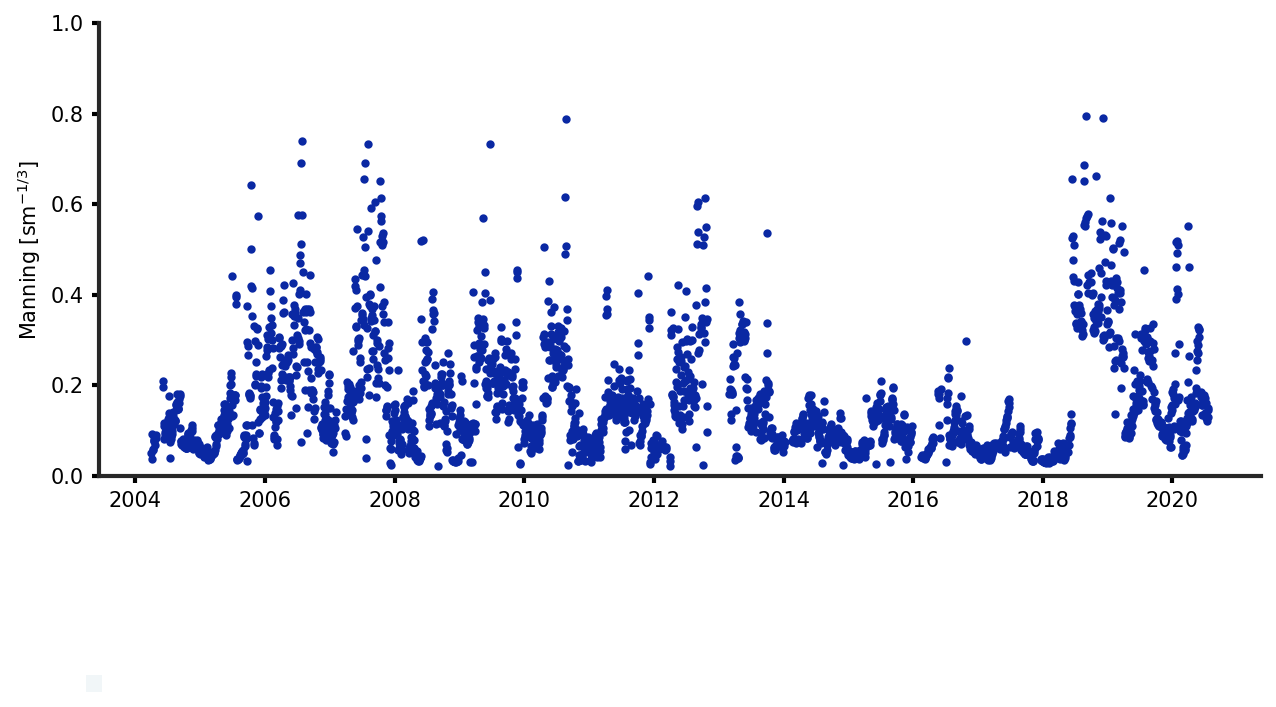

In [3]:
fig, ax = plt.subplots(1, figsize = (10, 4), dpi=150)
ax.plot(data.time, data.manning, '.')
SetPlotStyle(fig)
ax.set_ylabel('Manning [sm$^{-1/3}$]')
ax.set_ylim([0, 1])
plt.savefig(f'check_seasonality.png')


Here we do see some seasonality. However, we also see other interesting things. We see higher roughness values in the period 2006-2013 and lower in the periode 2014- early 2018. Then higher values in late 2018 to 2020. 

One possible explanation is that there is a period of lower discharges, which may lead to higher roughness values. Let's check that first


No handles with labels found to put in legend.


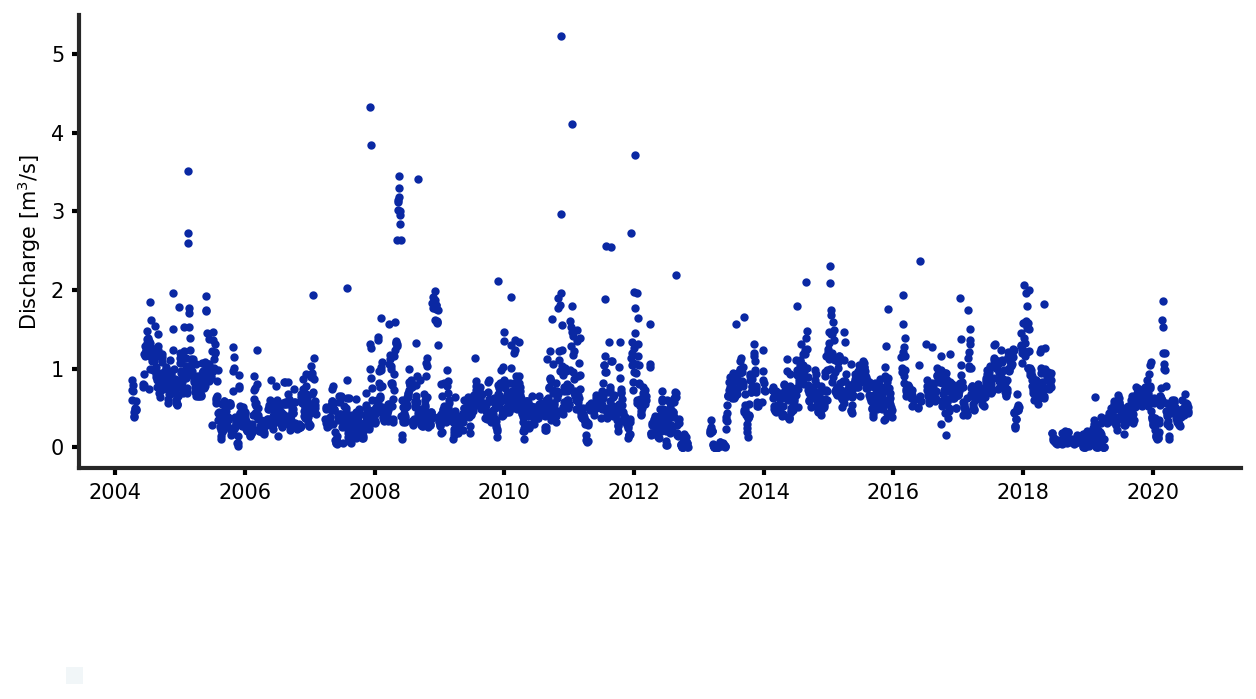

In [4]:
fig, ax = plt.subplots(1, figsize = (10, 4), dpi=150)
ax.plot(data.time, data.discharge, '.')
SetPlotStyle(fig)
ax.set_ylabel('Discharge [m$^{3}$/s]')
plt.savefig(f'check_discharge.png')


That seems to be the case indeed. The discharges are markedly lower in the periods with higher roughness values.

## Check for discharge dependency

The next check is for discharge dependency. If vegetation is likely the cause of the seasonality, we also expect an inverse relationship with discharge as vegetation reconfigures (bends, streamlines) with  increasing flow velocities. 

No handles with labels found to put in legend.


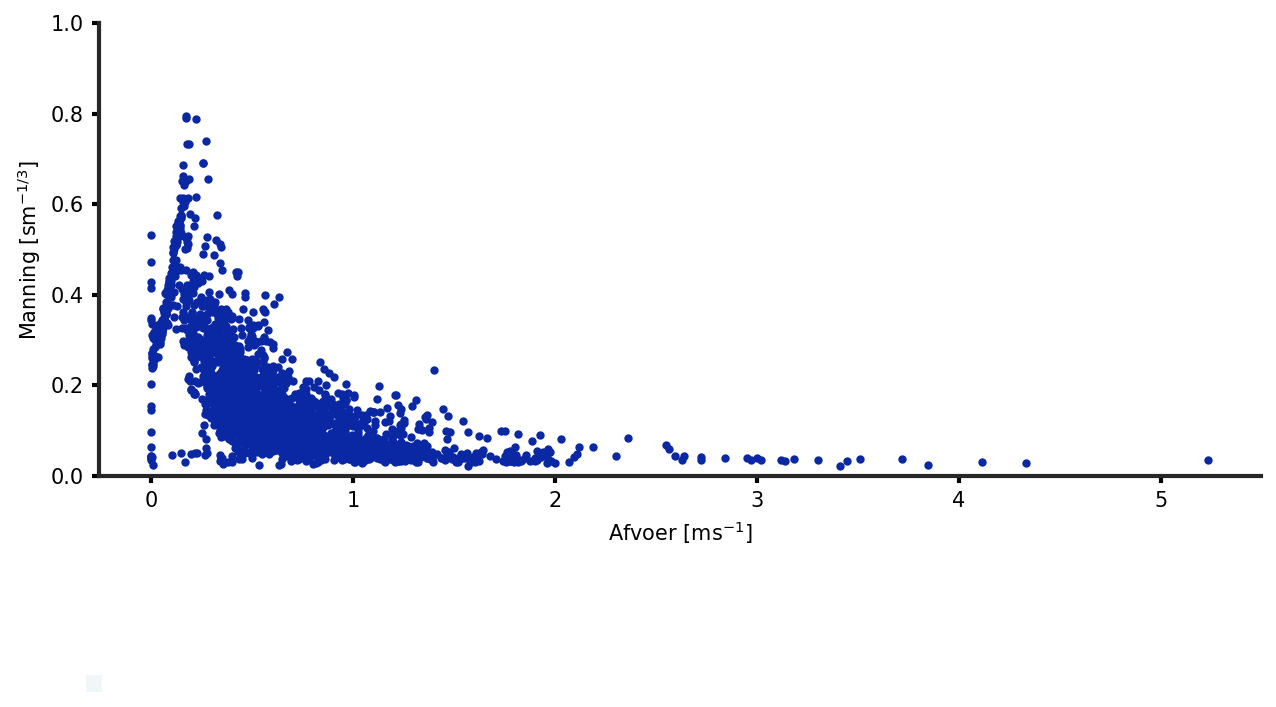

In [5]:
fig, ax = plt.subplots(1, figsize = (10, 4), dpi=150)
ax.plot(data.discharge, data.manning, '.')
SetPlotStyle(fig)
ax.set_ylabel('Manning [sm$^{-1/3}$]')
ax.set_ylim([0, 1])
ax.set_xlabel('Afvoer [ms$^{-1}$]')
plt.savefig(f'check_discharg_dependency.png')

And we do see this clearly. Bases on these checks we are fairly certain that vegetation is a key factor explaining the observed trends in roughness. 

## Other checks. 

Other checks may be done, but may not be as insightful. For example, a common analysis is to look at the rating curve:

No handles with labels found to put in legend.


Text(0.5, 0, 'Afvoer [ms$^{-1}$]')

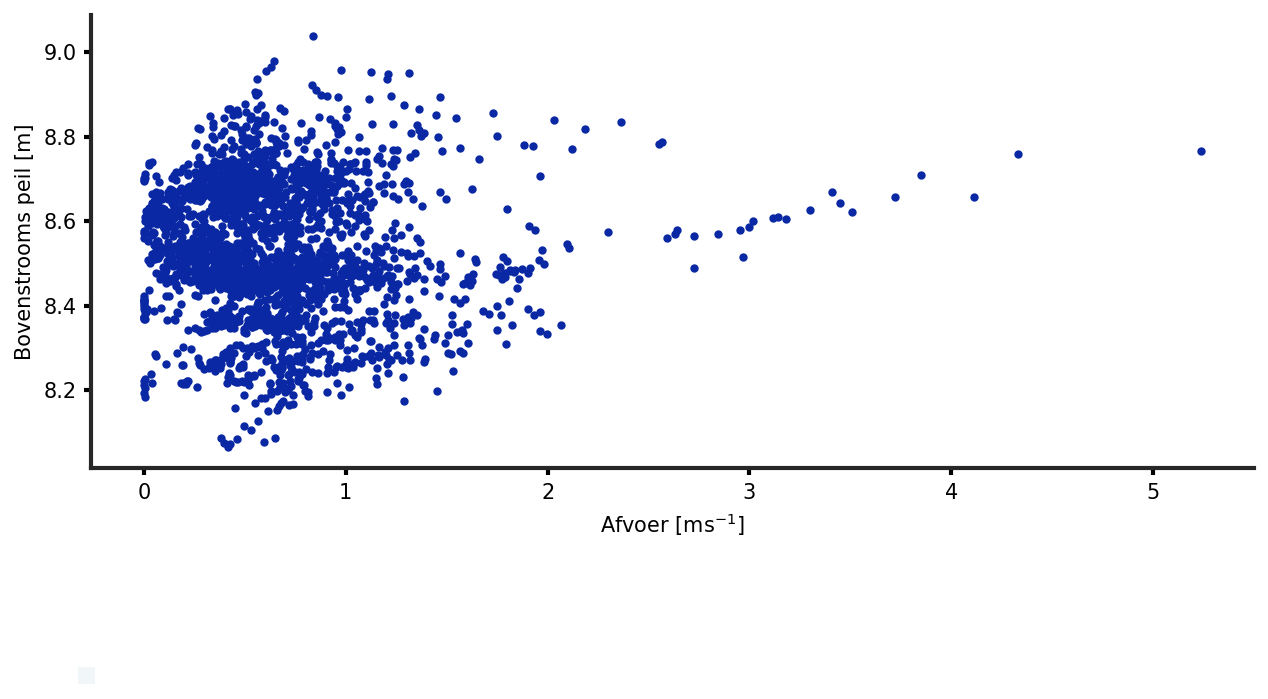

In [7]:
fig, ax = plt.subplots(1, figsize = (10, 4), dpi=150)
ax.plot(data.discharge, data.waterlevel_upstream, '.')
SetPlotStyle(fig)
ax.set_ylabel('Bovenstrooms peil [m]')
ax.set_xlabel('Afvoer [ms$^{-1}$]')


However, as can bee seen this seems to be a very random affair and does not tell us much. 